In [109]:
# description : this program uses a RNN called LSTM
# to predict closing stock price of a corportion using past 60 day stock price

In [110]:
#import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# import math
# import matplotlib.pyplot as plt
# import keras
# import pandas as pd
# import numpy as np
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# from keras.layers import Dropout
# from keras.layers import *
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error
# from sklearn.model_selection import train_test_split
# from keras.callbacks import EarlyStopping

In [111]:
# get the stock quote
df = web.DataReader('AMZN', data_source='yahoo', start= '2014-01-01', end='2021-04-11')
#show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,399.359985,394.019989,398.799988,397.970001,2137800,397.970001
2014-01-03,402.709991,396.220001,398.290009,396.440002,2210200,396.440002
2014-01-06,397.000000,388.420013,395.850006,393.630005,3170600,393.630005
2014-01-07,398.470001,394.290009,395.040009,398.029999,1916000,398.029999
2014-01-08,403.000000,396.040009,398.470001,401.920013,2316500,401.920013
...,...,...,...,...,...,...
2021-04-05,3235.959961,3161.239990,3173.000000,3226.729980,3334900,3226.729980
2021-04-06,3247.310059,3217.040039,3223.750000,3223.820068,2537800,3223.820068
2021-04-07,3303.610107,3223.649902,3233.800049,3279.389893,3346200,3279.389893


In [112]:
# get the bumber of rows and columns in the dataset
df.shape


(1830, 6)

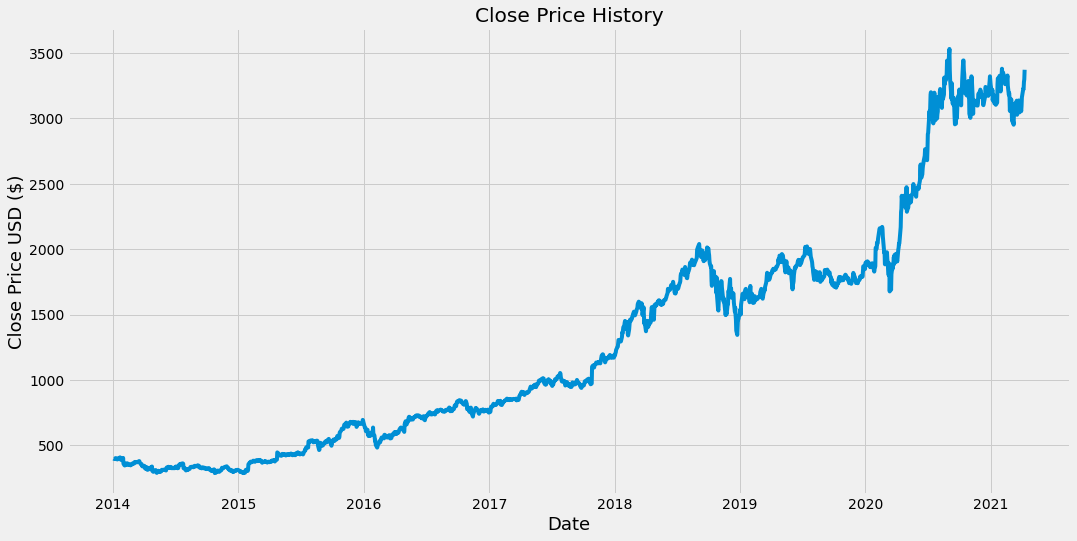

In [113]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [114]:
#Create a new dataframe with only the 'close'
data = df.filter(['Close'])
# convert the dataframe to a numpy array
dataset = data.values
#get or compute the number of rows to train the model
training_data_len = math.ceil(len(dataset)* .8)


training_data_len

1464

In [115]:
## Scale the data makes values between zero and one
scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0342179 ],
       [0.03374634],
       [0.03288026],
       ...,
       [0.92231158],
       [0.92844817],
       [0.95091694]])

In [116]:
#create the training dataset
#create scaled training data
train_data = scaled_data[0:training_data_len,:]
#split the data into xtrain and ytrain data sets

x_train = []
y_train = []

# appends the next 60 values to the xtrain array
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  #if statement is to visual what is going on!!!
  #y_train is the 61st data point that we are trying to predict
  if i<=61:
    print(x_train)
    print(y_train)
    print()




[array([0.0342179 , 0.03374634, 0.03288026, 0.0342364 , 0.03543535,
       0.03515488, 0.03412236, 0.03206349, 0.03408537, 0.03357065,
       0.03354908, 0.03472337, 0.03701648, 0.03624287, 0.03480351,
       0.03102173, 0.03061488, 0.03312682, 0.0299738 , 0.03577131,
       0.02211126, 0.01824626, 0.01880105, 0.01833873, 0.02084758,
       0.02284789, 0.02278317, 0.02306673, 0.01920172, 0.02165203,
       0.02169826, 0.02055786, 0.01862536, 0.01937124, 0.01843427,
       0.0199815 , 0.02199722, 0.02245338, 0.02255509, 0.02316227,
       0.02244721, 0.02371705, 0.02632763, 0.0262629 , 0.02623208,
       0.02576051, 0.02523347, 0.02579442, 0.02606257, 0.02674988,
       0.02715056, 0.02830019, 0.0265927 , 0.0252797 , 0.02270611,
       0.02000308, 0.02088457, 0.01740175, 0.01587918, 0.0158237 ])]
[0.01523192597930012]

[array([0.0342179 , 0.03374634, 0.03288026, 0.0342364 , 0.03543535,
       0.03515488, 0.03412236, 0.03206349, 0.03408537, 0.03357065,
       0.03354908, 0.03472337, 0.03

In [117]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [118]:
#reshape the x_train dataset
#lstm expects the data to be 3 dimensional
#(samples, timesteps, features)

#currently 2 dimensional
print('shape at 2d')
x_train.shape
#(1543,60)

#(sample size needs to be a variable(x_train.shape[0]), 60 timesteps(x_train.shape[1]), and 1 feature (closing price))
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print('shape at 3d')
x_train.shape




shape at 2d
shape at 3d


(1404, 60, 1)

In [ ]:
# # THIS MODEL DOES NOT DO AS WELL ( probably because this program only takes in account the last 60 days of stock prices)
# other programs model training code
# model = Sequential()
# #Adding the first LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
# model.add(Dropout(0.2))
# # Adding a second LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
# # Adding a third LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
# # Adding a fourth LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50))
# model.add(Dropout(0.2))
# # Adding the output layer
# model.add(Dense(units = 1))

# # Compiling the RNN
# model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# # Fitting the RNN to the Training set
# model.fit(x_train, y_train, epochs = 25, batch_size = 16)

In [120]:
#NEW PROGRAMS MODEL TRAINING CODE
# THIS MODEL DOES BETTER THAN THE OTHER MODEL
#build the lstm model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [121]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [122]:
#train the model
#COULD MAYBE PLAY AROUND WITH BATCH SIZE AND EPOCHS
#OTHER MODEL USED BATCHSIZE = 100 , EPOCHS = 32
model.fit(x_train,y_train,batch_size=1, epochs=1)

In [132]:
#create the testing dataset
#create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [133]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [134]:
#reshape the data (samples , timesteps, features) --- like before
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [135]:
#get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
#changing the values back to 2d


In [136]:
# get the root mean squared error (RSME)
#closer to zero the more accurate
rmse = np.sqrt(np.mean(predictions - y_test) **2)
rmse

187.31430637380464

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


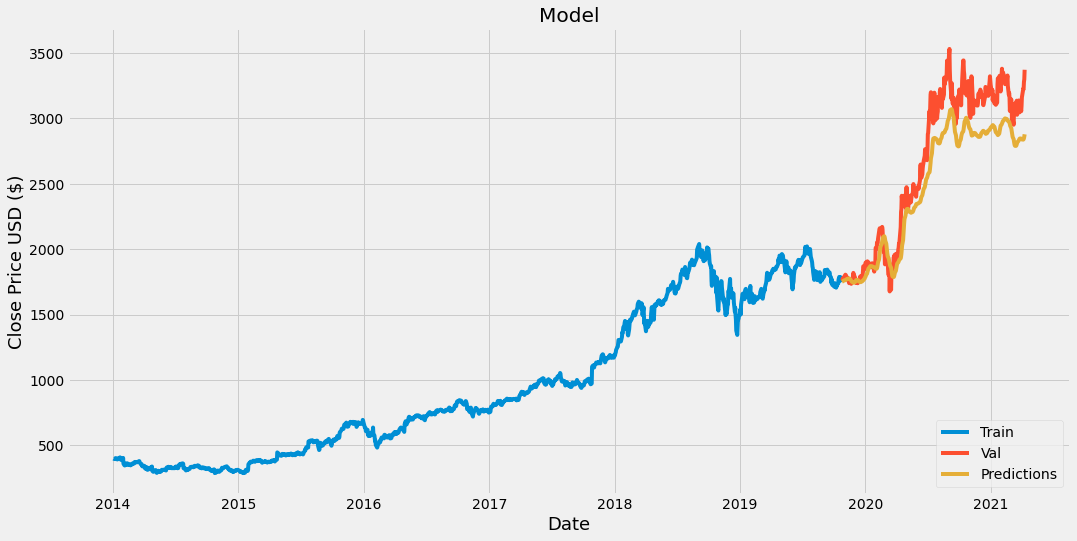

In [137]:
#plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize the data

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()


In [138]:
# show the valid and the predicted prices
valid 

,Close,Predictions
Date,,
2019-10-25,1761.329956,1751.275635
2019-10-28,1777.079956,1755.002808
2019-10-29,1762.709961,1757.809570
2019-10-30,1779.989990,1759.656494
2019-10-31,1776.660034,1760.871338
...,...,...
2021-04-05,3226.729980,2837.869141
2021-04-06,3223.820068,2840.915771
2021-04-07,3279.389893,2848.699219


In [139]:
#  THIS BLOCK GETS PREDICTS THE PRICE FOR DECEMBER 18TH 2019 WITHOUT IT BEING IN THE DATA

# get the quote 
apple_quote = web.DataReader('AMZN', data_source='yahoo', start= '2014-01-01', end='2021-04-11')
#create a new dataframe
new_df = apple_quote.filter(['Close'])
#get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create and empty list
X_test = []
#Append the last 60 days
X_test.append(last_60_days_scaled)

#convert the X_test dataset to a numpy array
X_test = np.array(X_test)

#reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

#get predicted scale price
pred_price = model.predict(X_test)

#undo scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)


apple_quote2 = web.DataReader('AMZN', data_source='yahoo', start= '2021-04-12', end='2021-04-12')
print(apple_quote2['Close'])

##find a way to find actual - predicted 
# print(apple_quote2['Close',[0]] - pred_price[[0]])

# print(apple_quote2['Close'] - pred_price[0])

[[2899.7234]]
Date
2021-04-12    3379.389893
Name: Close, dtype: float64
